### Description

Anthropometrics is the study of the measurement of the human body in terms of the size, weight, and proportions of its various parts.

### Introduction

Anthropometrics is an important tool in the field of medicine, as it allows for the assessment of a person's health and nutritional status, as well as the identification of potential health risks.

Anthropometric measurements can be used to assess the body composition of adults, which can help to identify potential health risks such as sarcopenia (age-related loss of muscle mass) or obesity. In a clinical setting, anthropometric measurements are typically used in combination with other medical tests and evaluations to provide a more complete picture of a person's health. For example, a doctor may use anthropometric measurements in combination with blood tests and imaging studies to assess a person's nutrition status, or to identify potential health risks such as cardiovascular disease or diabetes. Additionally, these measurements may be used to help monitor the effectiveness of treatment interventions, such as weight loss programs, and to track changes in a person's health over time.

### Measurement protocol 
<!-- long measurment protocol for the data browser -->
Our anthropometric measurements include height, weight, waist circumference, hip circumference, and neck circumference. The equipment used in this protocol includes a measuring tape and a scale, specifically a Shekel stadiometer (Shekel Ultrasonic Physician BMI Scale h 120-4). The stadiometer used is shown in the figure below. 

![image alt](002-anthropometrics/anthro_intro.png)

For measuring height, participants are asked to stand with their face against the scale, legs parallel to each other, toes pointing forward, and soles flat on the floor. Ensure participant's posture is unsupported, to stand as tall as possible, completely standing on the scale with legs straight. The height is recorded in centimeters. 

For measuring weight, the participant is asked to remove their shoes and excess clothing, and stand on the stadiometer. The weight is recorded in kilograms. The measurement protocol for the waist, hip, and neck circumference include specific instructions for standing position, and the use of measuring tape. All circumference measurements are recorded in centimeters.

### Data availability 
<!-- for the example notebooks -->
The information is stored in 1 parquet file: `anthropometrics.parquet`

### Summary of available data 
<!-- for the data browser -->
A data frame of tabular data containing individual level body measurement records and derived measures, including:
- Height (measured in centimeters using stadiometer)
- Weight (measured in kilograms)
- Waist circumference (measured in centimeters)
- Hip circumference (measured in centimeters)
- Neck circumference (measured in centimeters)
- Derived measures such as Body Mass Index (BMI) and waist-to-hip ratio

### Relevant links

* [Pheno Knowledgebase](https://knowledgebase.pheno.ai/datasets/002-anthropometrics.html)
* [Pheno Data Browser](https://pheno-demo-app.vercel.app/folder/2)


In [1]:
#| echo: false
import pandas as pd
pd.set_option("display.max_rows", 500)

In [2]:
from pheno_utils import PhenoLoader

In [3]:
pl = PhenoLoader('anthropometrics')
pl

PhenoLoader for anthropometrics with
12 fields
2 tables: ['anthropometrics', 'age_sex']

# Data dictionary

In [4]:
pl.dict

,folder_id,feature_set,field_string,relative_location,description_string,stability,field_type,data_coding,units,sampling_rate,strata,sexed,array,list_of_tags,bulk_dictionary,bulk_file_extension,debut,completed,transformation,pandas_dtype
tabular_field_name,,,,,,,,,,,,,,,,,,,,
collection_date,2,anthropometrics,Collection date (YYYY-MM-DD),anthropometrics/anthropometrics.parquet,Collection date (YYYY-MM-DD),Accruing,Date,NaN,Time,NaN,Primary,Both sexes,Single,Antrhoprometry; Physical Measures; Body size m...,NaN,NaN,2019-01-29,NaN,NaN,datetime64[ns]
collection_timestamp,2,anthropometrics,Collection timestamp,anthropometrics/anthropometrics.parquet,Collection timestamp,Accruing,Datetime,NaN,Time,NaN,Primary,Both sexes,Single,Antrhoprometry; Physical Measures; Body size m...,NaN,NaN,2019-01-29,NaN,NaN,"datetime64[ns, Asia/Jerusalem]"
height,2,anthropometrics,Height,anthropometrics/anthropometrics.parquet,Height,Accruing,Integer,NaN,cm,NaN,Primary,Both sexes,Single,Antrhoprometry; Physical Measures; Body size m...,NaN,NaN,2019-01-29,NaN,NaN,float
weight,2,anthropometrics,Weight,anthropometrics/anthropometrics.parquet,Weight,Accruing,Continuous,NaN,kg,NaN,Primary,Both sexes,Single,Antrhoprometry; Physical Measures; Body size m...,NaN,NaN,2019-01-29,NaN,NaN,float
bmi,2,anthropometrics,Body mass index (BMI),anthropometrics/anthropometrics.parquet,"Body mass index (BMI), weight in kilograms div...",Accruing,Continuous,NaN,kg/m2,NaN,Primary,Both sexes,Single,Antrhoprometry; Physical Measures; Body size m...,NaN,NaN,2019-01-29,NaN,NaN,float
waist_circumference,2,anthropometrics,Waist circumference,anthropometrics/anthropometrics.parquet,"Waist circumference, measurement taken around ...",Accruing,Integer,NaN,cm,NaN,Primary,Both sexes,Single,Antrhoprometry; Physical Measures; Body size m...,NaN,NaN,2019-01-29,NaN,NaN,float
neck_circumference,2,anthropometrics,Neck circumference,anthropometrics/anthropometrics.parquet,"Neck circumference, measured at the mid-point ...",Accruing,Integer,NaN,cm,NaN,Primary,Both sexes,Single,Antrhoprometry; Physical Measures; Body size m...,NaN,NaN,2022-05-19,NaN,NaN,float
hip_circumference,2,anthropometrics,Hip circumference,anthropometrics/anthropometrics.parquet,Hip circumference measured around the widest p...,Accruing,Integer,NaN,cm,NaN,Primary,Both sexes,Single,Antrhoprometry; Physical Measures; Body size m...,NaN,NaN,2019-01-29,NaN,NaN,float
waist_to_hip_ratio,2,anthropometrics,Waist to hip ratio,anthropometrics/anthropometrics.parquet,"Waist to hip ratio (WHR), a measure or the rat...",Accruing,Continuous,NaN,NaN,NaN,Primary,Both sexes,Single,Antrhoprometry; Physical Measures; Body size m...,NaN,NaN,2019-01-29,NaN,NaN,float


# Plot histogram and ecdf for bmi at baseline visit


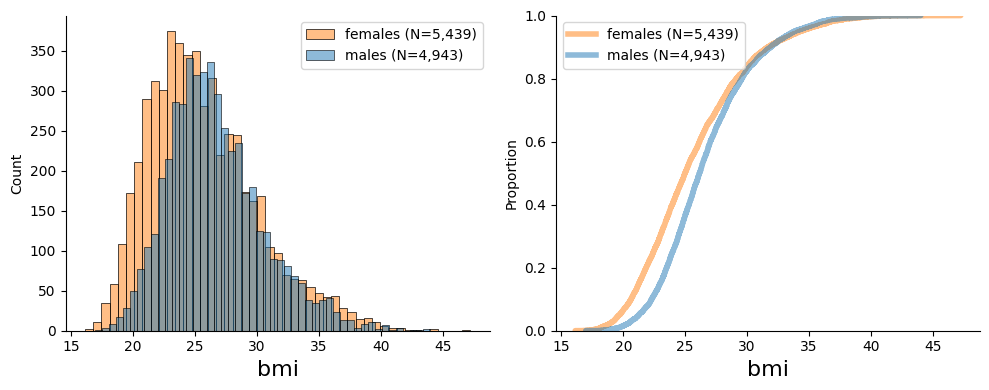

,count,mean,std,min,25%,50%,75%,max
bmi,10382.0,26.152419,4.177653,16.121167,23.198315,25.614045,28.528357,47.238043


In [5]:
from pheno_utils.basic_plots import hist_ecdf_plots

col = "bmi"
df = pl[[col] + ["age", "sex", "collection_date"]].loc[:,:,"00_00_visit",0,:]

# plot histogram and ecdf
hist_ecdf_plots(df.dropna(subset=[col,"sex", "age"]), col, gender_col="sex")

# stats
display(df[col].describe().to_frame().T)